In [1]:
import sys; sys.path.append("..")
from epi_model import *

In [118]:
a = temporalNetwork.load('high school').range(1,2)

In [20]:
ccc = a.node_attr['class']

classes = {
    c: [k for k,v in ccc.items() if v==c]
    for c in set(ccc.values())
}

In [21]:
css = a.node_attr['class']

In [22]:
nds = sorted(a.node_attr['class'])

In [23]:
class_map = a.node_attr['class']

In [24]:
C_DIST = 3

In [25]:
pos = {}

for i,c in enumerate(sorted(classes)):
    gnodes = [ k for k,v in class_map.items() if v==c ]
    
    G = nx.Graph()
    wts = Counter([(u,v) for t,u,v in a.edgelist if (u in gnodes and v in gnodes)])
    G.add_nodes_from(gnodes)
    G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts])
    pos_class = nx.spring_layout(G)
    
    shift_v = np.array( [
        np.cos((i/len(classes)) * 2 * np.pi),
        np.sin((i/len(classes)) * 2 * np.pi),
    ] ) * C_DIST
    #shift_v = np.array([C_DIST,0]) * i

    for k,v in pos_class.items():
        pos[k] = v + shift_v

In [26]:
len(nds)

327

In [27]:
len(pos)

327

In [28]:
len([x for x in a.edgelist if css[x[1]]==css[x[2]]])

17232

In [29]:
G = nx.Graph()
wts = Counter([(u,v) for t,u,v in a.edgelist])
G.add_weighted_edges_from([(u,v, wts[(u,v)]) for (u,v) in wts])

In [30]:
CUTOFF = 15 # 15 segments * 20s = 5 minutes

In [31]:
from matplotlib.patches import ConnectionStyle

(array([2563., 2480., 2322., 2019., 1603., 1228.,  723.,  228.,   51.,
           7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

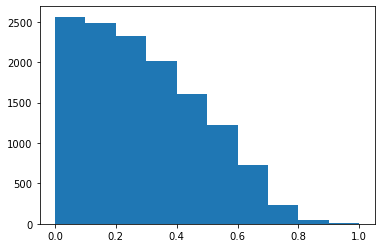

In [50]:
plt.hist(weights)

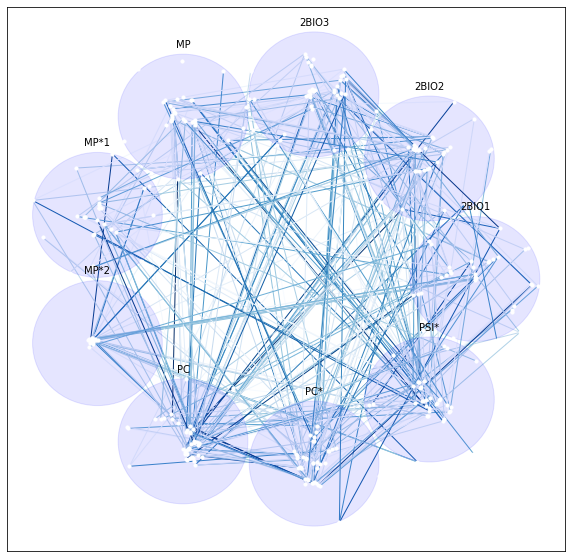

In [32]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = weights / np.max(weights)

weights = np.log(weights)
weights = weights + -np.min(weights)
weights = weights / weights.max()

#node_color='b', , 
arcs = nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues)
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='white')

for i,c in enumerate(sorted(classes)):
    shift_v = np.array( [
        np.cos((i/len(classes)) * 2 * np.pi),
        np.sin((i/len(classes)) * 2 * np.pi),
    ] ) * C_DIST
        
    # draw the circles
    circ = plt.Circle(shift_v, 1, color='b', alpha=0.1)
    plt.text( shift_v[0], shift_v[1]+1.1, c, horizontalalignment='center' )
    ax.add_patch(circ)
    
plt.savefig('classes_diagram_limited.png', dpi=300)

# the other one

In [17]:
b = temporalNetwork.load('high school2')

In [33]:
list(b.node_attr)

['role']

In [34]:
ccc = b.node_attr['role']

classes = {
    c: [k for k,v in ccc.items() if v==c]
    for c in set(ccc.values())
}

In [36]:
css = b.node_attr['role']

In [38]:
nds = sorted(b.node_attr['role'])

In [39]:
class_map = b.node_attr['role']

In [40]:
C_DIST = 3

In [54]:
q8 = np.quantile( np.array(list(wts.values())), 0.8 )

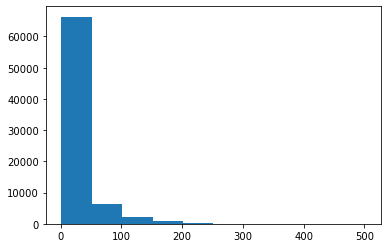

In [55]:
plt.hist( list(wts.values()) );

In [56]:
G = nx.Graph()
wts = Counter([(u,v) for t,u,v in b.edgelist])
G.add_nodes_from(gnodes)
G.add_weighted_edges_from([(u,v,w) for (u,v),w in wts.items() if w>=q8])
pos = nx.spring_layout(G)

In [57]:
len(nds)

790

In [58]:
len(pos)

765

In [76]:
def doit(x):
    if x < 0:
        return -np.power(-x, 0.2)
    else: return np.power(x, 0.2)

In [77]:
pos_l = {
    k: [doit(v[0]), doit(v[1])]
    for k,v in pos.items()
}

In [94]:
CUTOFF = 100

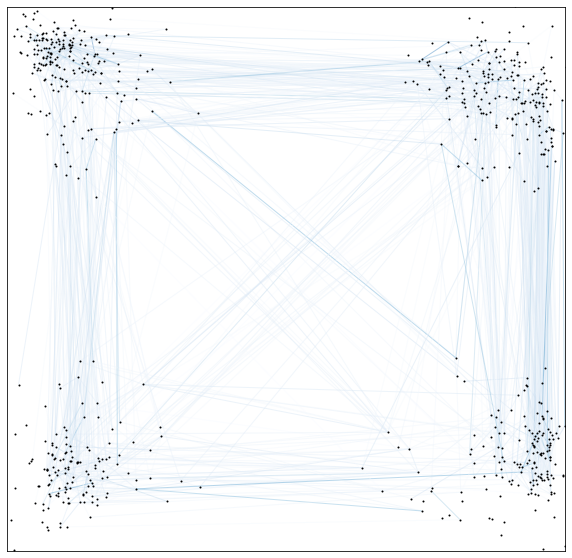

In [103]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = weights / np.max(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
arcs = nx.draw_networkx_edges(G, pos_l, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues, alpha=0.4)
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos_l, node_size=1, node_color='black')
    
plt.savefig('classes_diagram_limited.2.png', dpi=300)
plt.xlim((-0.5, 0.5))
plt.ylim((-0.5, 0.5))
if False:
    plt.xlim((
        min(x[0] for x in pos_l.values()),
        max(x[0] for x in pos_l.values())
    ))
    plt.ylim((
        min(x[1] for x in pos_l.values()),
        max(x[1] for x in pos_l.values())
    ))

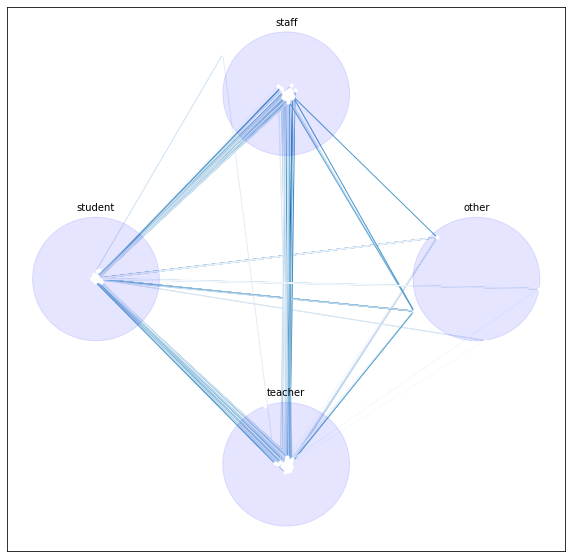

In [49]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = weights / np.max(weights)

weights = np.log(weights)
weights = weights + -np.min(weights)
weights = weights / weights.max()

#node_color='b', , 
arcs = nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues)
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='white')

for i,c in enumerate(sorted(classes)):
    shift_v = np.array( [
        np.cos((i/len(classes)) * 2 * np.pi),
        np.sin((i/len(classes)) * 2 * np.pi),
    ] ) * C_DIST
        
    # draw the circles
    circ = plt.Circle(shift_v, 1, color='b', alpha=0.1)
    plt.text( shift_v[0], shift_v[1]+1.1, c, horizontalalignment='center' )
    ax.add_patch(circ)
    
plt.savefig('classes_diagram_limited.2.png', dpi=300)

# simpler 1st one...

In [143]:
wts = Counter([(u,v) for t,u,v in a.edgelist])
q8 = np.quantile( np.array(list(wts.values())), 0.8 )

In [164]:
G = nx.Graph()
G.add_nodes_from(gnodes)
G.add_weighted_edges_from([(u,v,w) for (u,v),w in wts.items() if w>=q8])
pos = nx.spectral_layout(G)

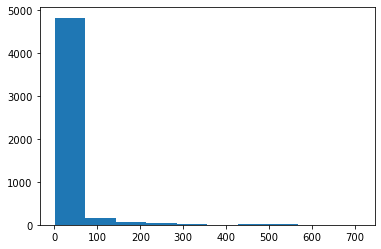

In [165]:
plt.hist( list(wts.values()) );

In [166]:
def doit(x):
    return x
    if x < 0:
        return -np.power(-x, 0.2)
    else: return np.power(x, 0.2)

In [167]:
pos_l = {
    k: [doit(v[0]), doit(v[1])]
    for k,v in pos.items()
}

In [168]:
CUTOFF = 0

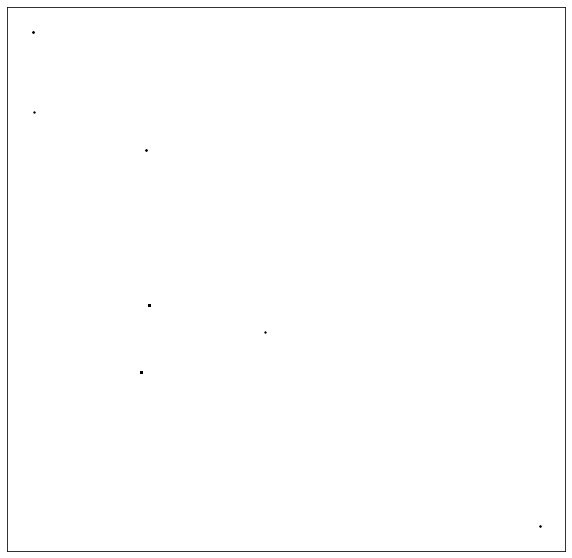

In [169]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = weights / np.max(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
arcs = nx.draw_networkx_edges(G, pos_l, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues, alpha=0.4)
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos_l, node_size=1, node_color='black')
    
plt.savefig('classes_diagram_limited.1a.png', dpi=300)
if False:
    plt.xlim((-0.5, 0.5))
    plt.ylim((-0.5, 0.5))

    plt.xlim((
        min(x[0] for x in pos_l.values()),
        max(x[0] for x in pos_l.values())
    ))
    plt.ylim((
        min(x[1] for x in pos_l.values()),
        max(x[1] for x in pos_l.values())
    ))